In [1]:
from csoundengine import OfflineEngine

end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance


In [2]:
e = OfflineEngine()




--Csound version 6.19 (double samples) May  8 2024
[commit: 937aa495e250d758efaa28e9697a8b75237c80cd]
libsndfile-1.2.0
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
writing 1024-byte blks of shorts to /tmp/csoundengine-4j9ocj0w.wav (WAV)
SECTION 1:


In [3]:
e.hasBusSupport()

True

In [4]:
e.compile(r'''
instr foo
  ibus = p4
  ifreq = busin:i(ibus)
  prints "foo, ibus: %d, ifreq: %d\n", ibus, ifreq
  a0 oscili 0.1, ifreq
  outch 1, a0
endin
''')


In [5]:
bus = e.assignBus(value=1000)

In [6]:
e.sched('foo', 1, 2, bus)

'foo'

In [7]:
e.writeBus(bus, value=2000, delay=0.)

foo, ibus: 0, ifreq: 2000
end of score.		   overall amps:  0.10000  0.00000
	   overall samples out of range:        0        0
0 errors in performance
512 1024 sample blks of shorts written to /tmp/csoundengine-4j9ocj0w.wav (WAV)


RenderJob(outfile='/tmp/csoundengine-4j9ocj0w.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=0.0, process=None)
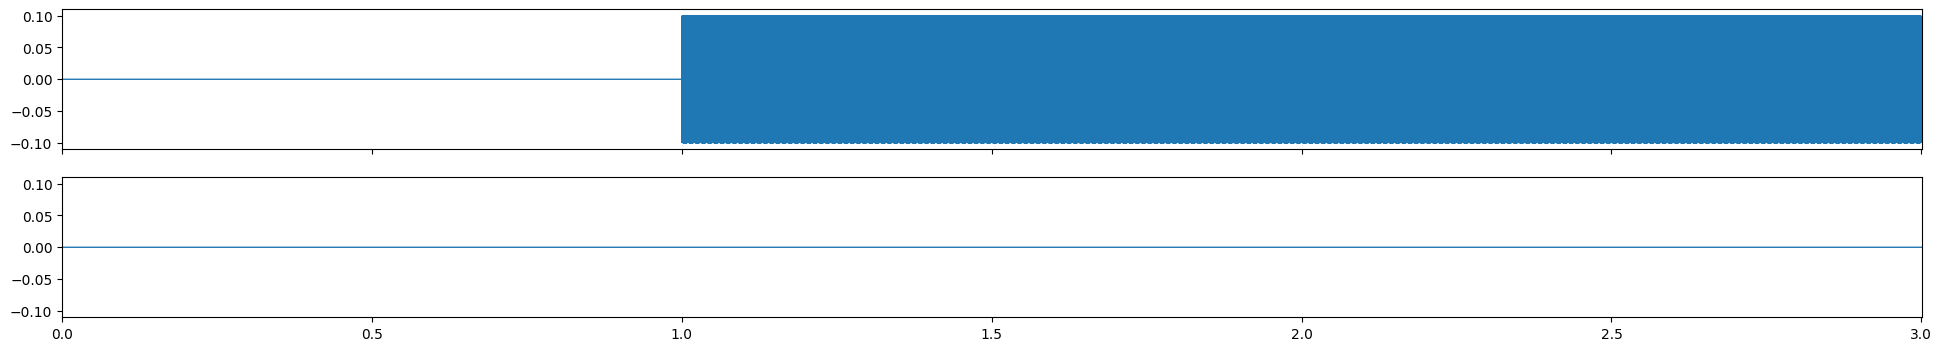

In [8]:
e.stop()

RenderJob(outfile='/tmp/csoundengine-7sg0p815.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=0.0, process=<Popen: returncode: None args: ['/usr/local/bin/csound', '-o', '/tmp/csounde...>)
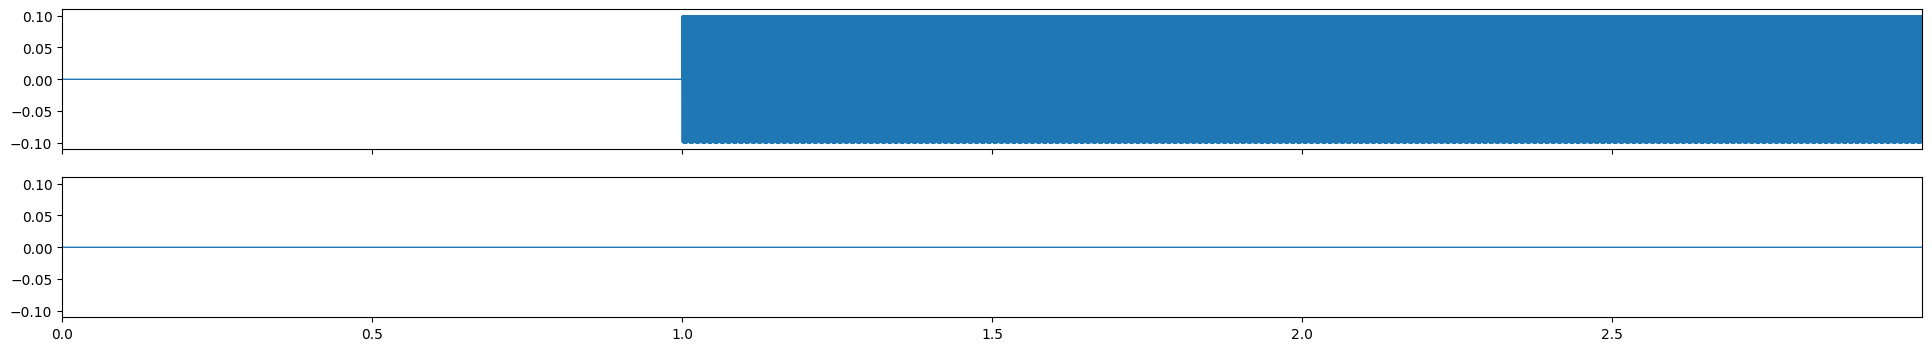

In [9]:
csd = e.generateCsd()
csd.render()

In [10]:
csd.write('~/tmp/offlinebus.csd')